In [1]:
import pandas as pd

In [2]:
house_df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


Drop 'Unnamed' and "Price" (we don't need Price as we will use UNSUPERVISED ML)

In [5]:
df = house_df.drop([house_df.columns[0],house_df.columns[7]],axis=1)

In [6]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2


In [8]:
X = df.values

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


Using the elbow method

In [9]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

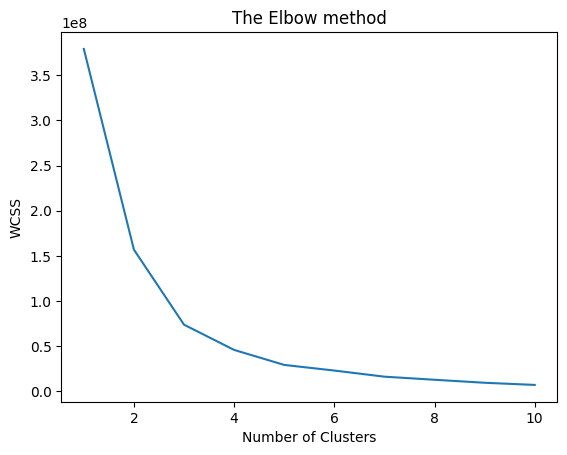

In [10]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

The elbow is at k=3 so train the model using this

In [17]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans3 = kmeans_3.fit_predict(X)

Trying to plot clusters using just Sqft and Floor

In [12]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2


In [27]:
df.insert(6,"Cluster",y_kmeans3)

In [34]:
import seaborn as sns
import numpy as np

In [49]:
centroids_data  = {"centroid_X":kmeans_3.cluster_centers_[:, 0],
                   "centroid_Y":kmeans_3.cluster_centers_[:, 1],}

In [50]:
centroids_df = pd.DataFrame(centroids_data)

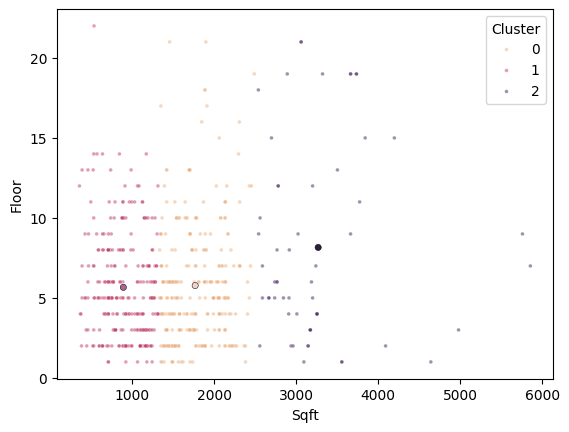

In [62]:
ax = sns.scatterplot(df,x="Sqft",y="Floor",hue="Cluster",alpha=0.5,s=7,palette="flare")
ax = sns.scatterplot(centroids_df,x="centroid_X",y="centroid_Y",
                     hue=range(3),  s=20, ec='black', legend=False, ax=ax)

Saving Cluster along with original data

In [55]:
df.to_csv("clusters.csv")